# 0.1 Introduction to Data Visualization

In [27]:
import matplotlib.pyplot as plt

#### First Look: Line Chart

##### Creating the data points

In [13]:
import numpy as np
x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
S, C = np.sin(x), np.cos(x)

# Display x's shape and first 10 elements
print('x')
print(x.shape)
print(x[:10])
print()

# Display S's shape and first 10 elements
print('S')
print(S.shape)
print(S[:10])
print()

# Display C's shape and first 10 elements
print('C')
print(C.shape)
print(C[:10])

x
(256,)
[-3.14159265 -3.11695271 -3.09231277 -3.06767283 -3.04303288 -3.01839294
 -2.993753   -2.96911306 -2.94447311 -2.91983317]

S
(256,)
[-1.22464680e-16 -2.46374492e-02 -4.92599411e-02 -7.38525275e-02
 -9.84002783e-02 -1.22888291e-01 -1.47301698e-01 -1.71625679e-01
 -1.95845467e-01 -2.19946358e-01]

C
(256,)
[-1.         -0.99969645 -0.99878599 -0.99726917 -0.99514692 -0.99242051
 -0.98909161 -0.98516223 -0.98063477 -0.97551197]


##### Our first plot

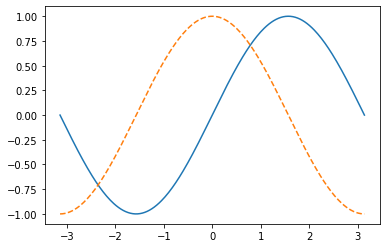

In [14]:
# Start your figure
plt.figure()

# Plot sine curve with a solid - line
plt.plot(x, S, '-')

# Plot cosine curve with a dotted -- line
plt.plot(x, C, '--')

# Display plot and show result on screen.
plt.show()

All our plots will begin by first initiating a figure (plt.figure()), and end with displaying the plot (plt.show()). In between, we'll call the functions which decide what gets plotted. In this case, we used the plt.plot function to plot lines. 

#### A more detailed look at plotting

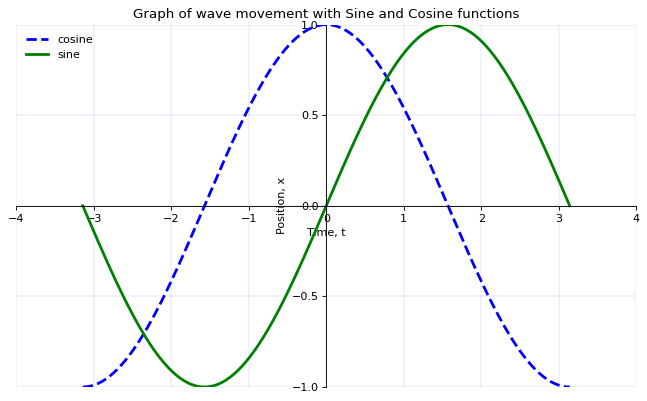

In [15]:
## Create a new figure of size 10x6 inches, using 80 dots per inch
fig = plt.figure(figsize=(10,6), dpi=80)

## Plot cosine using blue color with a dotted line of width 1 (pixels)
plt.plot(x, C, color="blue", linewidth=2.5, linestyle="--", label="cosine")

## Plot sine using green color with a continuous line of width 1 (pixels)
plt.plot(x, S, color="green", linewidth=2.5, linestyle="-", label="sine")

## Set axis limits and ticks (markers on axis)
# x goes from -4.0 to 4.0
plt.xlim(-4.0, 4.0)
# 9 ticks, equally spaced
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))
# Set y limits from -1.0 to 1.0
plt.ylim(-1.0, 1.0)
# 5 ticks, equally spaced
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

## Add legends, title and axis names
plt.legend(loc='upper left', frameon=False)
plt.title("Graph of wave movement with Sine and Cosine functions")
plt.xlabel("Time, t")
plt.ylabel("Position, x")

## Turn on grid
plt.grid(color='b', linestyle='-', linewidth=0.1)

## Moving spines to center in the middle
ax = plt.gca()

# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

plt.show()

The settings use a set to of default values unless specified.

##### Saving a plot

In [8]:
fig.savefig('my_figure.png')

There are multiple formats we can save this image in.

In [16]:
import pprint # pretty printer
pprint.pprint(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}


#### Types of plots

here are all the kinds of plots you can call (more on this below):

    ‘bar’ or ‘barh’ for bar charts
    ‘hist’ for histograms
    ‘box’ for boxplots
    ‘kde’ or 'density' for density plots
    ‘area’ for area plots
    ‘scatter’ for scatter plots
    ‘hexbin’ for hexagonal bin plots
    ‘pie’ for pie charts

#### Bar Chart

A bar chart is a good choice when you want to show how some quantity varies among some discrete set of items. Let’s create a Bar chart from described set.

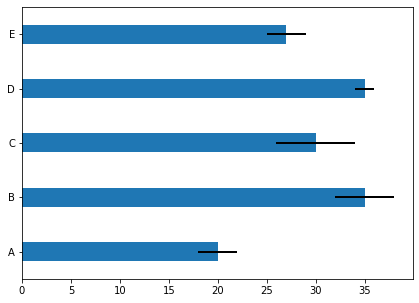

In [17]:
# Setting figure size to 7x5
fig = plt.figure(figsize=(7,5))

# Setting data set
men_means = [20, 35, 30, 35, 27]
men_stds = [2, 3, 4, 1, 2]

# Setting index
ind = np.arange(5)

# Setting argument for width
width = 0.35

# Plotting a horizontal bar graph for men_means against index
# with errorbars equal to standard deviation
error_args = {'ecolor': (0, 0, 0), 'linewidth': 2.0}
plt.barh(ind, men_means, width, xerr=men_stds, error_kw=error_args)

# Y-axis ticks and labels
ax = plt.gca()
ax.set_ylim(-0.5, 4.5)
ax.set_yticks(ind)
ax.set_yticklabels(['A', 'B', 'C', 'D', 'E', ])

plt.show()

In the plot, we need to separately calculate bottom, which is the y-axis position where the bar starts (position of bottom of each bar). error_args specify that the error bar is black in color, and its line-width is 2 pixels. 

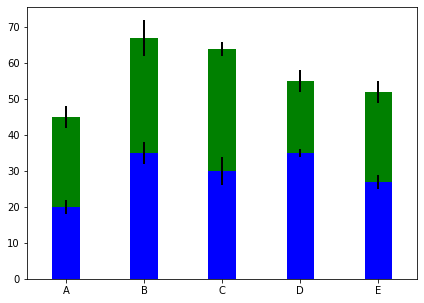

In [18]:
# Setting figure size to 7x5
fig = plt.figure(figsize=(7,5))

# Setting data set values
women_means = [25, 32, 34, 20, 25]
women_stds = [3, 5, 2, 3, 3]

# Plotting a horizontal bar graph with men's data at the bottom and women's data on top.
p1 = plt.bar(ind, men_means, width, yerr=men_stds, color='b', error_kw=error_args)
p2 = plt.bar(ind, women_means, width, bottom=men_means, yerr=women_stds, color='g', error_kw=error_args)

# Modifying x-axis
ax = plt.gca()
ax.set_xlim(-0.5, 4.5)
ax.set_xticks(ind)
ax.set_xticklabels(['A', 'B', 'C', 'D', 'E', ])

plt.show()

#### Histogram

Histograms are plot type used to show the frequency across a continuous or discrete variable.

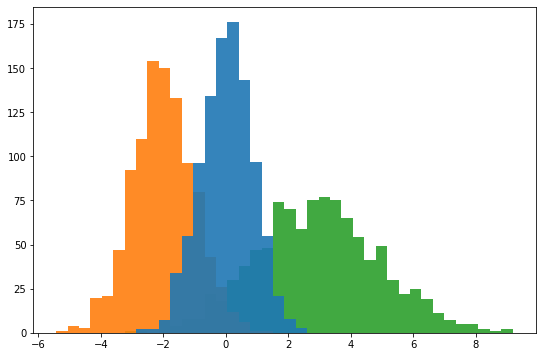

In [29]:
# Generate 3 different arrays
x = np.random.normal(0, 0.8, 1000)
y = np.random.normal(-2, 1, 1000)
z = np.random.normal(3, 2, 1000)

# Set figure size to 9x6
fig = plt.figure(figsize=(9, 6))

# Configure keyword arguments to customize histogram.
# Alpha adjusts translucency while bins define spacing.
# More features available in the documentation.
kwargs = {
        'histtype' : 'stepfilled',
        'alpha'    : 0.9,
        'bins'     : 40,
}

# Plot all 3 arrays on one graph
plt.hist([x, y, z], **kwargs)
plt.show()

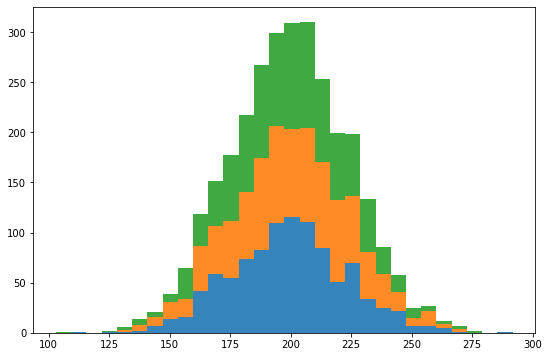

In [30]:
# Generate 3 dimensional numpy array
X = 200 + 25*np.random.randn(1000, 3)

# Set figure size to 9x6
fig = plt.figure(figsize=(9, 6))

# Plot histogram from 3 stacked arrays after normalizing data
n, bins, patches = plt.hist(X, 30, alpha=0.9, stacked=True, linewidth=0.0, rwidth=1.0)

plt.show()

#### Scatter Plot

A Scatter plot is the right choice for visualizing the entire dataset, and visually look for clusters or correlation.

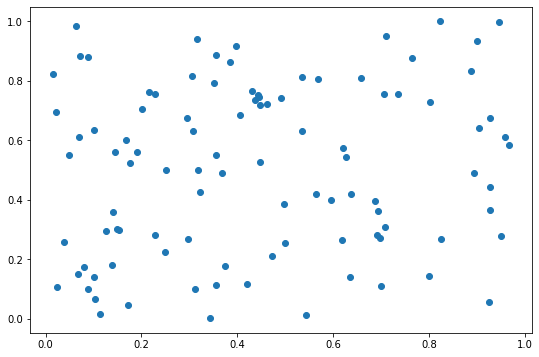

In [31]:
N = 100

# Generate 2 different arrays
x = np.random.rand(N)
y = np.random.rand(N)

fig = plt.figure(figsize=(9, 6))

# Plotting a scatter graph at the given x-y coordinates
plt.scatter(x, y)

plt.show()

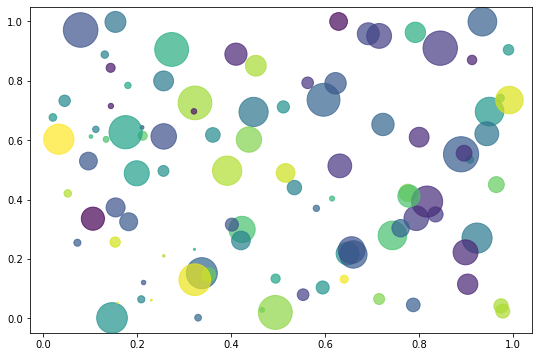

In [32]:
N = 100

# Generate 2 different arrays
x = np.random.rand(N)
y = np.random.rand(N)

fig = plt.figure(figsize=(9, 6))

# Assign random colors and variable sizes to the bubbles
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2 # 0 to 20 point radii

# Scatter plot on x-y coordinate with the assigned size and color
plt.scatter(x, y, s=area, c=colors, alpha=0.7)

plt.show()

#### Box and Whisker Plot

Box plot is an easy and effective way to read descriptive statistics. These statistics summarize the distribution of the data by displaying: minimum, first quartile, median, third quartile, and maximum in a single graph.

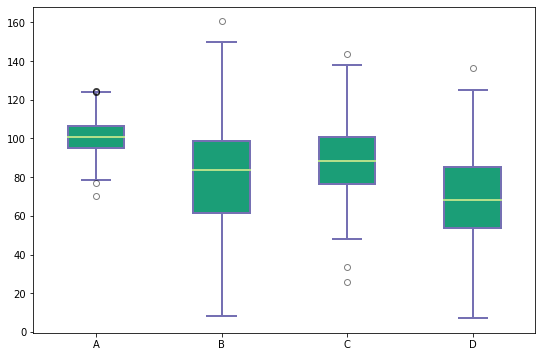

In [33]:
np.random.seed(10)

# Generate 4 different arrays and combine them in a list
u = np.random.normal(100, 10, 200)
v = np.random.normal(80, 30, 200)
w = np.random.normal(90, 20, 200)
x = np.random.normal(70, 25, 200)
data_to_plot = [u, v, w, x]

fig = plt.figure(figsize=(9, 6))

## Plot a box plot that shows the mean, variance and limits within each column.

# Add patch_artist=True option to ax.boxplot() to get fill color
bp = plt.boxplot(data_to_plot, patch_artist=True, labels=['A', 'B', 'C', 'D', ])

# change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set(color='#7570b3', linewidth=2)
    # change fill color
    box.set(facecolor = '#1b9e77')

# change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

# change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

# change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

# change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

plt.show()

The starts and end of the box mark the first-quartile and third-quartile values (i.e. 25 percentile - 75 percentile). The line inside the box marks the median value. The ends of the bars mark the minimum and the maximum values (excluding the outliers). Any dots above / below the error bars are the outlier data points. 

#### Area Plot

Area charts are used to represent cumulative totals using numbers or percentages over time. Since these plot by default are stacked they need each column to be either all positive or all negative values. 

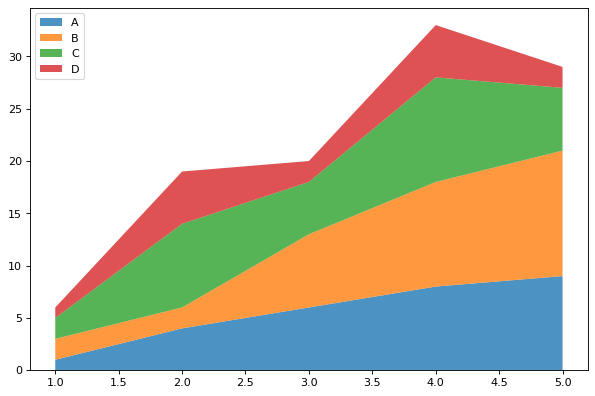

In [34]:
x = range(1,6)

# Set values for each line (4 lines in this example)
y = [
    [1, 4, 6, 8, 9],
    [2, 2, 7, 10, 12],
    [2, 8, 5, 10, 6],
    [1, 5, 2, 5, 2],
]

# Setting figure size to 9x6 with dpi of 80
fig = plt.figure(figsize=(9,6), dpi=80)

# Stacked area plot
plt.stackplot(x, y, labels=['A','B','C','D'], alpha=0.8)

# Set location of legend
plt.legend(loc='upper left')

plt.show()

#### Pie Chart

Pie charts show percentage or proportion of data. This percentage represented by each category is right next to its corresponding slice of pie. For pie charts in Matplotlib, the slices are ordered and plotted counter-clockwise, as shown:

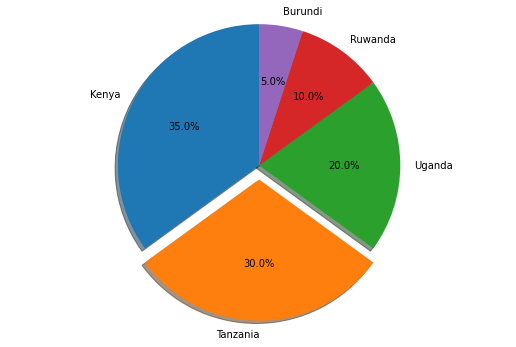

In [35]:
# Set keyword arguments
labels = 'Kenya', 'Tanzania', 'Uganda', 'Ruwanda', 'Burundi'
sizes = [35, 30, 20, 10 ,5]
explode = (0, 0.1, 0, 0, 0) # only "explode" the 2nd slice (i.e. 'Tanzania')

# Plot pie chart with the above set arguments
fig = plt.figure(figsize=(9, 6))
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Above, autopct='%1.1f%%' says display the percentage with 1 digit precision. And startangle=90 says that the first pie (Kenya) should start from angle 90 degrees (angle is the angle made with positive x-axis). 

# 0.2 some example with real life data

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
dataset = pd.read_csv('data/diabetes.csv')
 
for column in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]:
  bad = (dataset[column] == 0)
  dataset.loc[bad, column] = None
 
dataset.describe()
dataset.info()
 
normalized = (dataset - dataset.mean()) / dataset.std()
normalized["Outcome"] = (normalized["Outcome"] > 0.0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [38]:
## bar plot data

diabetic_means     = normalized[normalized["Outcome"] == True].mean()[:-1]
diabetic_stds      = normalized[normalized["Outcome"] == True].std()[:-1]

non_diabetic_means = normalized[normalized["Outcome"] == False].mean()[:-1]
non_diabetic_stds  = normalized[normalized["Outcome"] == False].std()[:-1]

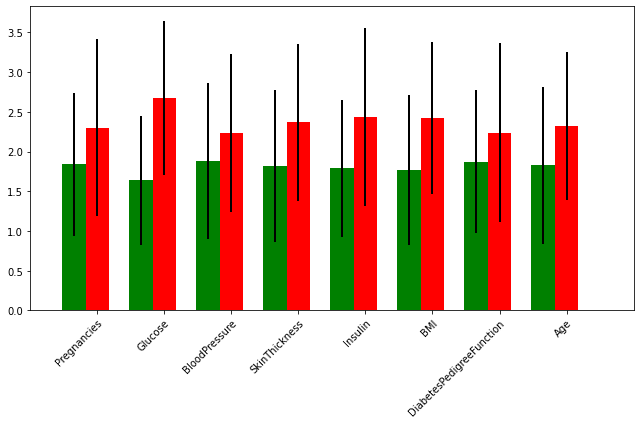

In [39]:
## bar plot

fig = plt.figure(figsize=(9, 6))

indices = np.arange(len(diabetic_means))
width = 0.35
error_args = {'ecolor': (0, 0, 0), 'linewidth': 2.0}

p1 = plt.bar(indices, diabetic_means + 2.0, width, yerr=diabetic_stds, color='r', error_kw=error_args)
p2 = plt.bar(indices-width, non_diabetic_means + 2.0, width, yerr=non_diabetic_stds, color='g', error_kw=error_args)

ax = plt.gca()
ax.set_xlim(-1.0, 8)
ax.set_xticks(indices)
ax.set_xticklabels(diabetic_means.index)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.tight_layout()

# plt.show()
fig.savefig('barplot.png')

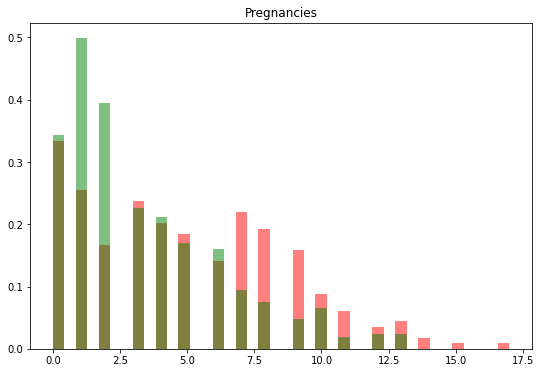

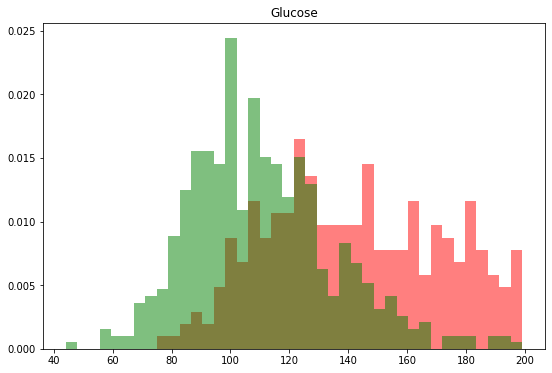

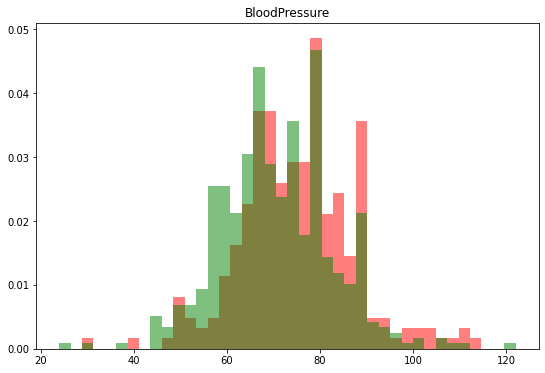

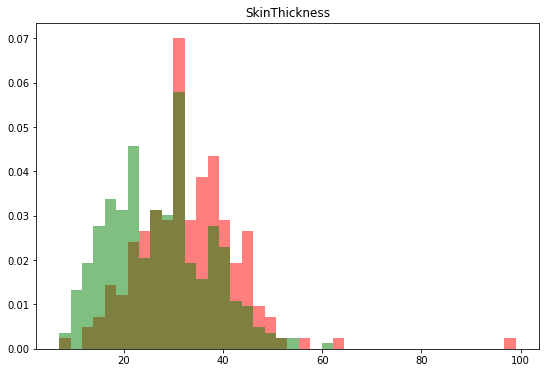

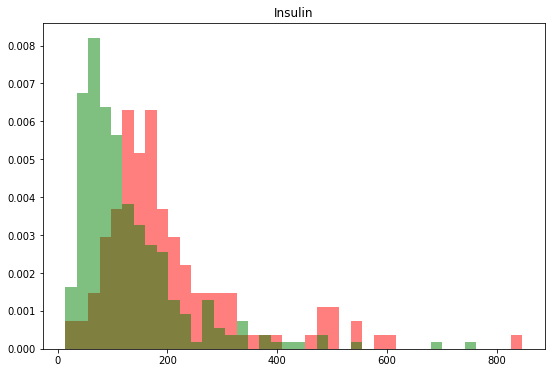

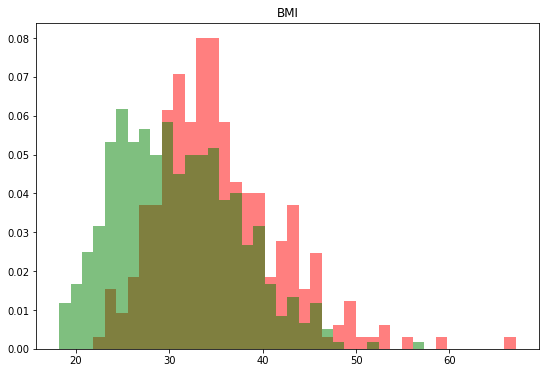

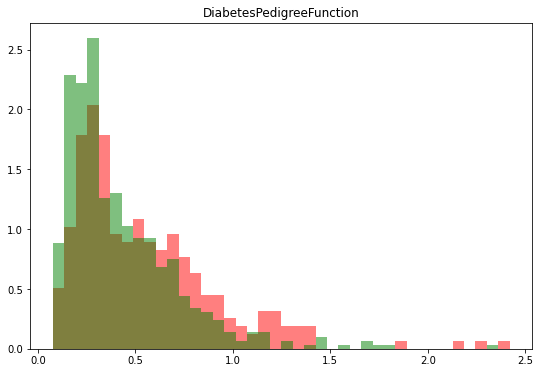

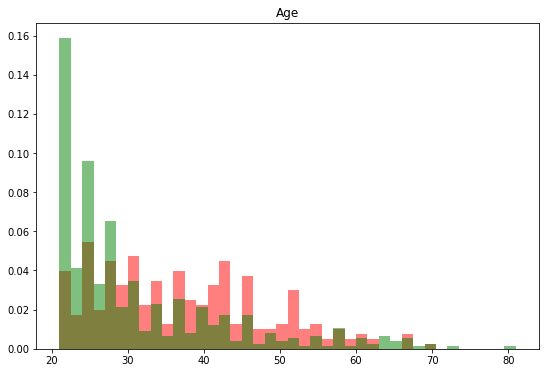

In [41]:
## Histogram of each feature, etc.

features = dataset.columns[:-1]

def histogram(feature):
    xx = dataset.loc[(dataset["Outcome"] == 0) & np.logical_not(dataset[feature].isnull()), feature]
    yy = dataset.loc[(dataset["Outcome"] == 1) & np.logical_not(dataset[feature].isnull()), feature]

    fig = plt.figure(figsize=(9, 6))
    kwargs = {
            'histtype' : 'stepfilled',
            'alpha'    : 0.5,
            'density'  : True,
            'bins'     : 40,
            'color'    : ['g', 'r', ],
    }
    plt.title(feature)
    plt.hist([xx, yy, ], **kwargs)
    plt.show()
    #fig.savefig('histogram_%s.png' % feature)

for feature in features:
    histogram(feature)

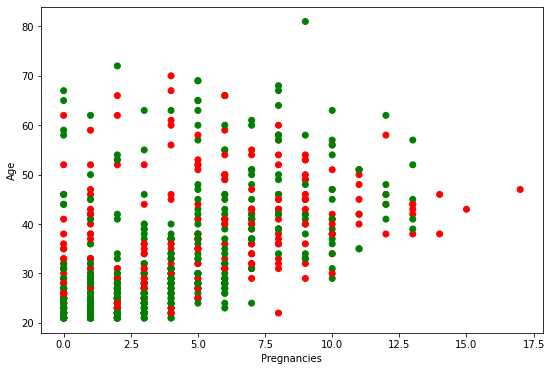

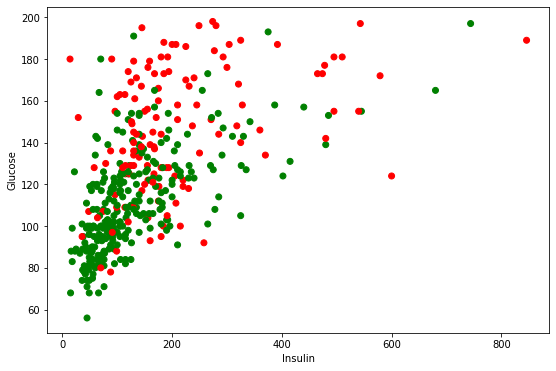

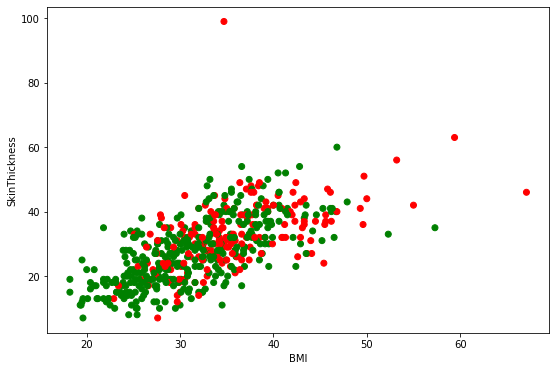

In [48]:
## Scatterplot of correlated pairs of variables

pairs = [
    ('Pregnancies', 'Age'),
    ('Insulin', 'Glucose'),
    ('BMI', 'SkinThickness'),
]

def scatterplot(v1, v2):
    good = np.logical_not(dataset[v1].isnull()) & np.logical_not(dataset[v2].isnull())
    xx = dataset.loc[good, v1]
    yy = dataset.loc[good, v2]
    cc = np.array(['g', 'r'])[dataset.loc[good, "Outcome"]]

    fig = plt.figure(figsize=(9, 6))
    plt.scatter(xx, yy, c=cc)

    plt.xlabel(v1)
    plt.ylabel(v2)

    plt.show()
    #fig.savefig('scatterplot_%s_%s.png' % (v1, v2))

for v1, v2 in pairs:
    scatterplot(v1, v2)

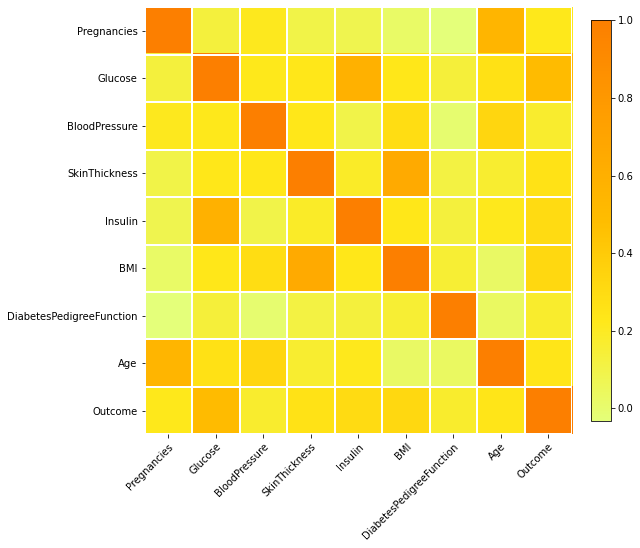

In [46]:
## Correlation heatmap

def heatmap(data, row_labels, col_labels):
    # Adapted from https://matplotlib.org/examples/images_contours_and_fields/interpolation_methods.html
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels for the rows
        col_labels : A list or array of length M with the labels for the columns

    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """
    fig = plt.figure(figsize=(9, 9))

    ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, cmap="Wistia", interpolation="nearest")

    # Create colorbar
    ax.figure.colorbar(im, ax=ax, fraction=0.043, pad=0.04)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))

    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()

    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.tight_layout()

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)

    ax.grid(which="minor", color="w", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", bottom=False, left=False, right=False, top=False)

    plt.show()
    #fig.savefig('heatmap.png')

heatmap(dataset.corr(), dataset.columns, dataset.columns)

# 0.3 Histogram

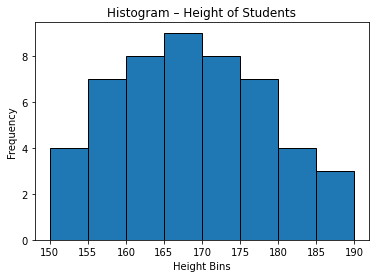

In [49]:
# height data
heights = [
    158.9, 175.4, 167.2, 162.3, 152.6, 159.2, 176.9, 155.8, 163.6, 181.9,
    167.4, 161.5, 180.9, 171.6, 165.6, 160.1, 172.7, 155.3, 171.2, 162.7,
    175.7, 182.1, 188.4, 157.0, 189.1, 168.7, 178.9, 162.3, 186.9, 178.8,
    166.0, 165.9, 169.3, 155.4, 178.9, 181.4, 162.2, 176.5, 165.9, 150.6,
    172.7, 174.9, 150.9, 152.2, 172.6, 170.7, 171.5, 169.4, 155.9, 162.7,
]

# plot histogram
# 'ec' stands for edge color. we add black borders to the bars.
plt.hist(heights, bins=8, range=(150,190), ec='black')

# add title and axis labels
plt.title("Histogram – Height of Students")
plt.ylabel("Frequency")
plt.xlabel("Height Bins")

# display the plot
plt.show()

Notice how we choose range and bins such that all the intervals have integer values — in this case, 150 - 155, 155 - 160, and so on

Note: We should choose the number of bins wisely for histograms. Way too few bins does not reveal any information, since all the data points will belong to the same bar. On the other hand, too many bins will make a separate bar for each data point. As a rule of thumb, for realistic data you usually want around 20 - 50 bins. 

#### Histograms for various types of frequency distributions

#### Skew

##### Symmetric

In a symmetric distribution, data points are symmetrically distributed around the mean. In these cases, the mean is approximately equal to the median. An example of a symmetric distribution is the height of individuals in a locality. A lot of the data observed in nature follows this distribution.

The histogram representing a symmetric distribution has the left and right hand sides roughly equally balanced around the centre. You can observe that the left and right tails in the graph below have about the same length.
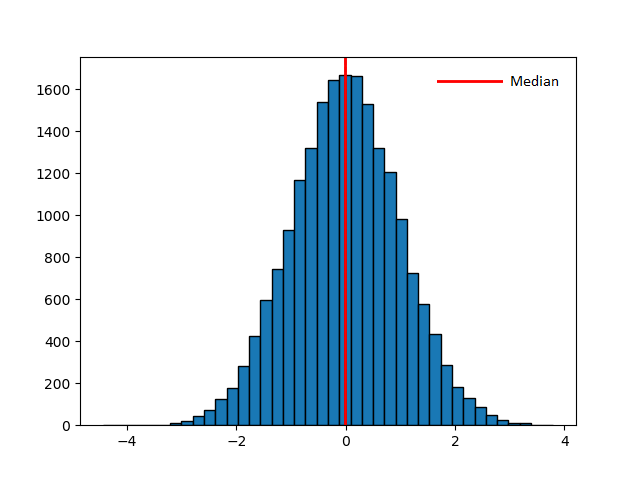

##### Right Skewed (Positively skewed)

Variables representing income or wealth of individuals etc., are right (positively) skewed. This is because the majority of individual have either low income or medium income, but a small minority of individuals are very rich or extremely rich.

The histogram of a right skewed distribution has a long tail to the right. In these cases, the mean is typically greater than the median. 
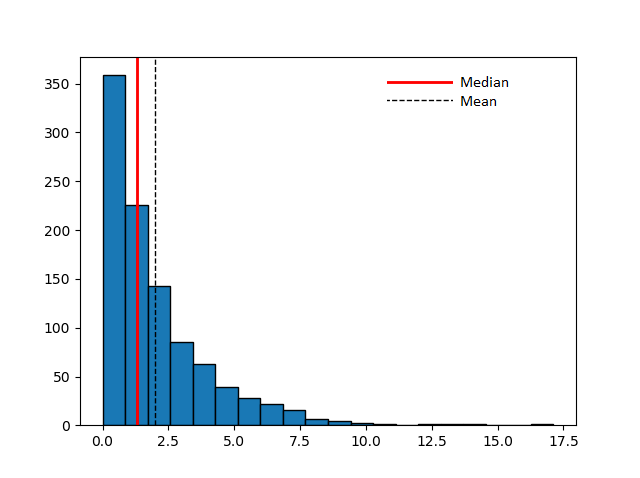

##### Left Skewed (Negatively skewed)

Similarly, if the histogram has a long tail to the left, we can assume that the data is from a negatively skewed distribution. In a left skewed distribution, most data points will be greater than the mean.

Observe the shape of the histogram with a long left tail. In this case, the mean is typically less than the median. 
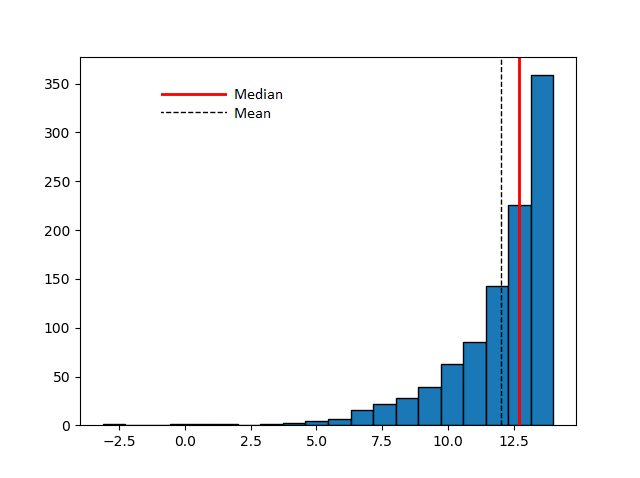

##### Kurtosis

Apart from the left / right skew of the data distribution, another important thing to notice in histograms is the "tailedness" of a distribution, or how much of the data is close to the center vs in the tails. This property of the distribution is known as its kurtosis.

##### Mesokurtic (Normal tailed)

To measure how heavy or light-tailed a distribution is, we take the normal distribution (also known as Gaussian distribution) as the point of comparison. Below is a histogram plot of data points from a normal distribution. 
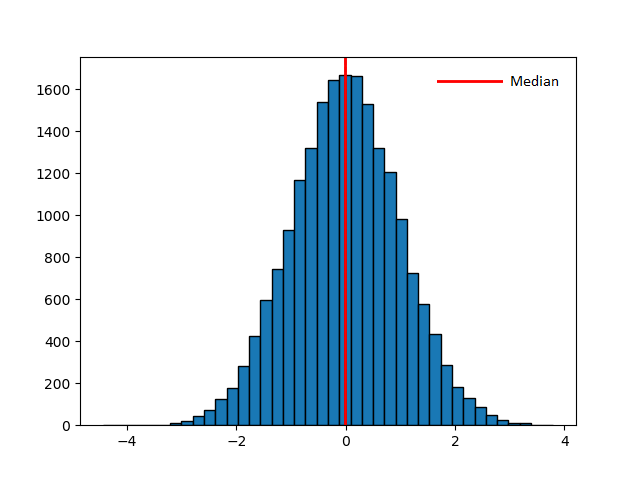

##### Leptokurtic (Heavy tailed)

A distribution whose tails are heavier than the normal distribution is called leptokurtic. Often, this kind of distribution will have heavy tails as well as a taller center, but lesser data points at a moderate distance from the center. 
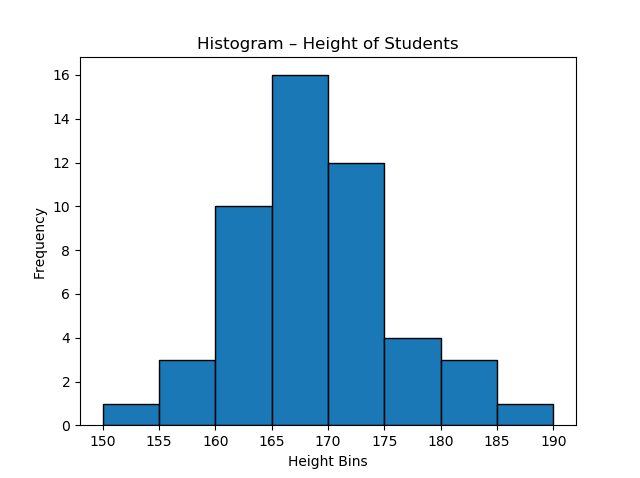

##### Platykurtic (Light tailed)

A distribution whose tails are thinner than the normal distribution is called platykurtic. In some cases (as in the plot below), the tails might be completely non-existent.
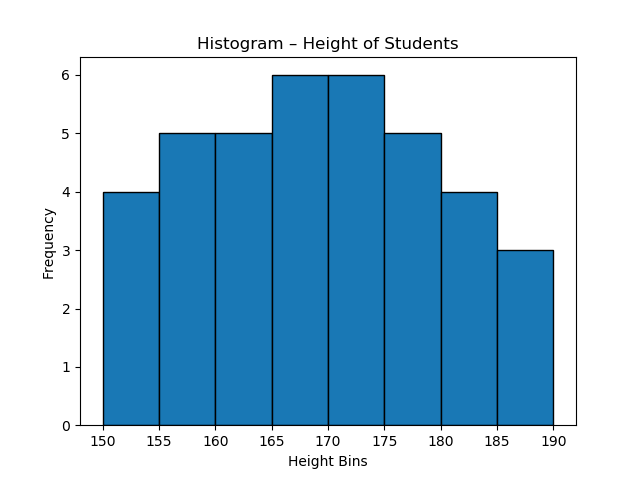

#### Histogram for multiple distributions

Let's first create the data which we will be plotting:

In [50]:
# random seed so that the generated values are always same
np.random.seed(2)
# 1000 values for USA incomes with mean 100 and standard deviation 30
income_USA = 30 * np.random.randn(1000) + 100
# 1000 values for UK incomes with mean 85 and standard deviation 20
income_UK = 20 * np.random.randn(1000) + 85

##### Superimposed histogram

In a superimposed histogram, we display the histograms layered on top of each other. 

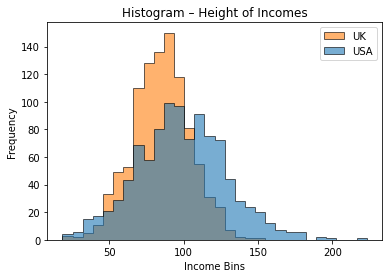

In [51]:
# Superimposed histogram
plt.hist([income_USA, income_UK], label=['USA', 'UK'], histtype='stepfilled',
    alpha=0.6, bins=30, ec='black')
# 'alpha' sets the 'opacity'.
# if alpha = 1.0 (default) we won't be able to see the second histogram behind.

# add title and axis labels
plt.title("Histogram – Height of Incomes")
plt.ylabel("Frequency")
plt.xlabel("Income Bins")

# add legend
plt.legend(loc='upper right')

# display plot
plt.show()

Notice some things about the code above:

    To plot multiple data together, we pass all of them to the hist() function.
    We use the label argument to label the data, and the legend() function to display the labels.
    To create a superimposed histogram, we set the parameter histtype's value to be 'stepfilled'. There are other histogram types as well, which we will see in the next section.
    Lastly, since the histograms are layered on top of each other, we used the alpha parameter to make the histograms a little transparent so that we can also see 'behind' it. 

From the histogram, we can see that on average income levels in USA are higher than in UK (note that income is on the x-axis, so higher income means the histogram is shifted to the right).

We can also see that incomes of employees from USA have a higher spread (since the histogram is wider).

##### Stacked Histogram

Apart from superimposing the plots, there are other ways to plot the distributions in the same graph. One option is to stack the multiple sets of data over one another. For that, we assign the parameter histtype the value 'barstacked'. 

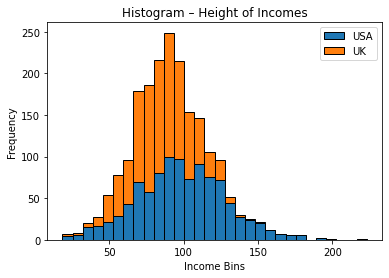

In [52]:
# Stacked histogram
plt.hist([income_USA,income_UK], label=['USA','UK'], histtype='barstacked', bins=30, ec='black')
plt.title("Histogram – Height of Incomes")
plt.ylabel("Frequency")
plt.xlabel("Income Bins")
plt.legend(loc='upper right')
plt.show()

Stacking makes it easier to see the combined frequency, while making it harder to see the exact frequency within each category. 

##### Side by side histogram

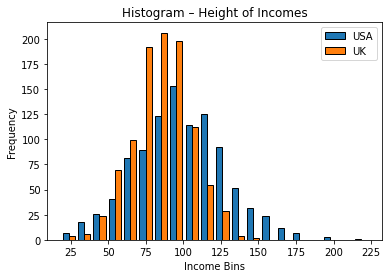

In [53]:
# Side by side histogram
plt.hist([income_USA,income_UK], label=['USA','UK'], histtype='bar', bins=20, ec='black')
plt.title("Histogram – Height of Incomes")
plt.ylabel("Frequency")
plt.xlabel("Income Bins")
plt.legend(loc='upper right')
plt.show()

We can visually check the frequencies of income levels in USA and UK, and determine where one dominates the other. From the above plot, we can see that at very low and very high income levels, USA has a higher frequency, whereas in the middle regions, UK has a higher frequency.

# 0.4 Box Plots

Box plot (also called ‘box and whisker plot’) visualizes the distribution of numerical data and helps in identifying outliers present in the data. 

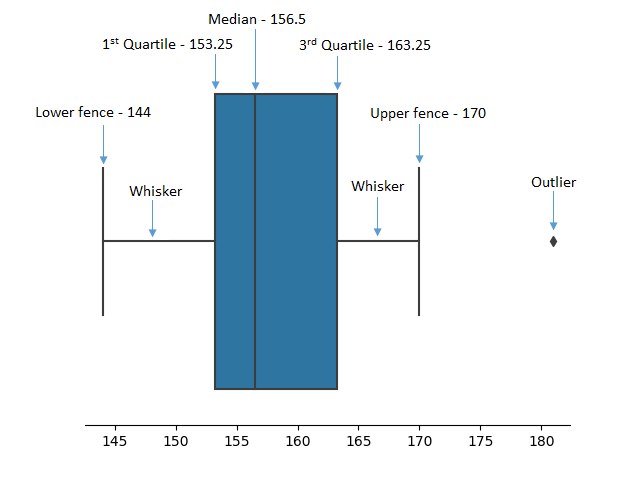

Notice the following components in the above box plot:

    1st Quartile (25th percentile)
    Median (2nd Quartile or 50th percentile)
    3rd Quartile (75th percentile)
    Interquartile Range (IQR – difference between 3rd and 1st Quartile)
    Whiskers — marks the lowest data point which lies within 1.5 IQR of the 1st quartile, and the highest datum which lies within 1.5 IQR of the 3rd quartile
    Outliers — any data points beyond 1.5 IQR of the 1st or 3rd quartile, i.e. values which are greater than 3rd Quartile + 1.5 * IQR or less than 1st Quartile – 1.5 * IQR. 

#### Outliers

Whenever we do any data analysis, outliers should be investigated carefully. They may contain valuable information about the problem under investigation, or inform us about errors in recording the data. Moreover, even a few outliers can distort many commonly used machine learning algorithms.

##### Creating a boxplot in Python

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


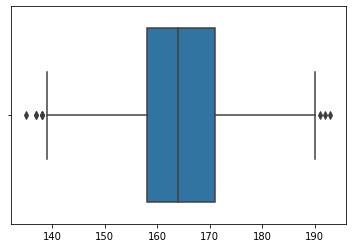

In [57]:
import seaborn as sns

# generate data - 1000 values with mean 165 and std dev 10
np.random.seed(0)
height = np.round((10 * np.random.randn(1000) + 165), 0)

# create box plot
sns.boxplot(height)
plt.show()

The above boxplot is for normally distributed data with mean 165 and standard deviation 10. For data that follows a symmetric distribution (such as the normally distributed data above), the box plot will be symmetrical as well. In other words:

    The median will be roughly in the middle of 1st and 3rd quartiles.
    The whisker lengths will be roughly equal.

#### Boxplot for Skewed distribution

c:\program files\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


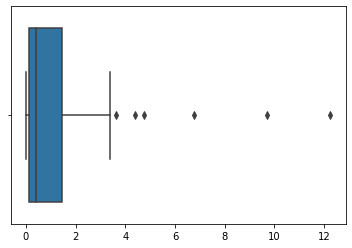

In [58]:
var = np.random.chisquare(1, 100) # generate 100 values
sns.boxplot(var)                  # plot
plt.show()

##### Multiple box plots

In [62]:
# generate data
np.random.seed(2)

# Group 1 has mean 165 and stddev 10
df1 = pd.DataFrame()
df1['Height'] = np.round((10 * np.random.randn(500) + 165), 0)
df1['Group'] = 'Group1'

# Group 2 has mean 170 and stddev 12
df2 = pd.DataFrame()
df2['Height'] = np.round((12 * np.random.randn(500) + 170), 0)
df2['Group'] = 'Group2'

df = df1.append(df2)

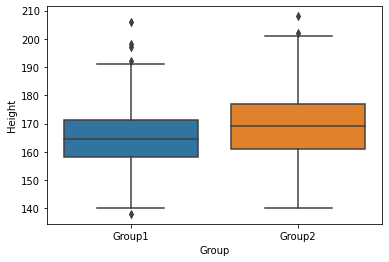

In [65]:
# create plot
sns.boxplot(x='Group', y='Height', data=df)
plt.show()

From the box plot, we can infer that on an average people from 'Group2' are taller than people from 'Group1'

#### Handling multiple categories simultaneously

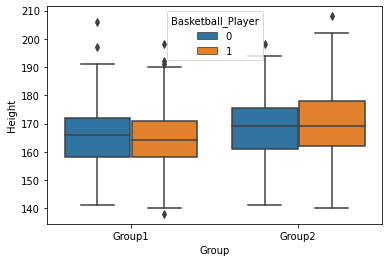

In [66]:
# randomly assign Basketball_Player status
df['Basketball_Player'] = np.random.randint(0, 2, df.shape[0])

# use the 'hue' parameter to add colors based on Basketball_Player status
sns.boxplot(x='Group', y='Height', hue='Basketball_Player', data=df)
plt.show()

Since we assigned the 'Basketball_Player' status randomly, we can see that 'Height' does not have much influence on for 'Basketball_Player' this data set.

#### Other parameters in seaborn.boxplot

So far, we've seen the x, y, data and hue parameters supported by the seaborn.boxplot() function. In this section, we'll see a couple more important parameters supported by the function.

    whis - Usually, we consider outliers to be the data points which are whose distance from the 1st and 3rd Quartiles is greater than 1.5 x IQR. We can change this setting using the parameter whis.
    orient - takes values ‘v’ or ‘h’ which sets the orientation of the box plot to vertical or horizontal, respectively.

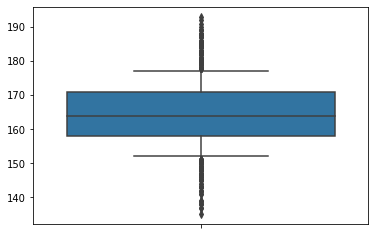

In [70]:
np.random.seed(0)
height = np.round((10 * np.random.randn(1000) + 165), 0)
sns.boxplot(y=height, orient='v', whis=0.5)
plt.show()

As you can see, the number of outliers increased significantly because of the reduced whisker length

#### summary


    Box plot can be used to summarize large data graphically. In particular, it highlights the various quartiles and outliers.
    We can create boxplots using the boxplot() function from the seaborn Python library.
    Looking at the boxplot allows us to easily infer whether the distribution is symmetric or skewed.
    Box plots allow us to compare a variable's value grouped by 1 or more categorical variables. 